# World AeroPress Championship Recipes

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import pandas as pd
import seaborn as sns

In [2]:
recipes = pd.read_csv("data/aeropress.csv")
recipes.head()

,Year,Rank,Name,Country,Coffee [gr],Water for brewing [gr],Water after brew [gr],Total Water [gr],Temperature [°C],Time [min]
0,2021,1,Tuomas Merikanto,Finland,18.0,200.0,NaN,200,80.0,2.00
1,2021,2,Maru Mallee,Netherlands,18.0,150.0,36.0,186,93.0,2.25
2,2021,3,Brandon Smith,South Africa,18.0,140.0,80.0,220,88.0,2.00
3,2019,1,Wndelien van Bunnik,Netherlands,30.0,100.0,120.0,220,92.0,1.00
4,2019,2,Benja Khemacheva,Thailand,35.0,100.0,110.0,210,94.0,1.75


In [3]:
recipes["Name"].nunique(), recipes["Country"].nunique()

(34, 22)

In [4]:
recipes["Name"].value_counts()[:3]

Jeff Verellen       4
Tuomas Merikanto    1
Emil Eriksson       1
Name: Name, dtype: int64

In [5]:
recipes["Country"].value_counts()[:10]

Belgium        5
Norway         3
USA            3
Finland        2
Japan          2
Slovakia       2
Netherlands    2
Poland         2
France         2
Denmark        2
Name: Country, dtype: int64

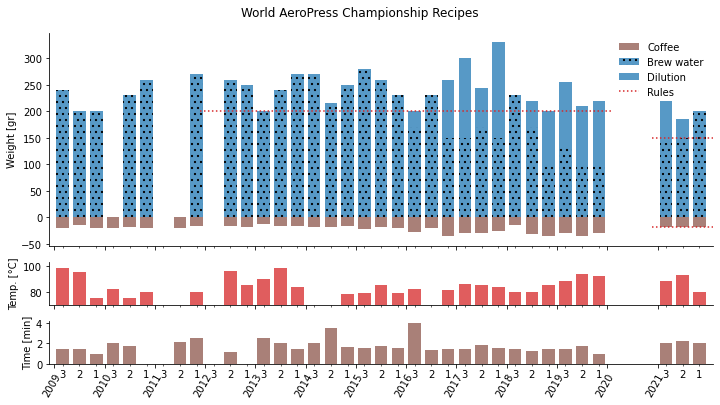

In [9]:
year_rank = lambda recipe: recipe["Year"] + (7 - 2 * recipe["Rank"]) / 6

fig, ax = plt.subplots(
    3, 1, figsize=[10.1, 5.7], sharex=True, gridspec_kw={"height_ratios": [5, 1, 1]}
)
plt.suptitle("World AeroPress Championship Recipes")

alpha = 0.75

ax[0].set_ylabel("Weight [gr]")
ax[0].bar(
    x=year_rank(recipes),
    height=-recipes["Coffee [gr]"],
    width=0.25,
    color="C5",
    alpha=alpha,
    label="Coffee",
)
ax[0].bar(
    x=year_rank(recipes),
    height=recipes["Water for brewing [gr]"],
    width=0.25,
    hatch="..",
    color="C0",
    alpha=alpha,
    label="Brew water",
)
ax[0].bar(
    x=year_rank(recipes),
    bottom=recipes["Water for brewing [gr]"],
    height=recipes["Water after brew [gr]"],
    width=0.25,
    color="C0",
    alpha=alpha,
    label="Dilution",
)

# Oldest reference I could find on 200ml rule was 2021:
# https://manlycoffee.tumblr.com/post/20242539158/rules-japan-aeropress-championships-2012
ax[0].hlines(200, 2011.9, 2020.1, color="C3", linestyle=":")
ax[0].hlines(150, 2020.9, 2022.1, color="C3", linestyle=":")
ax[0].hlines(-18, 2020.9, 2022.1, color="C3", linestyle=":", label="Rules")

handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(
    handles[1:4] + [handles[0]],
    labels[1:4] + [labels[0]],
    frameon=False,
)

ax[1].set_ylabel("Temp. [°C]")
ax[1].bar(
    x=year_rank(recipes),
    height=recipes["Temperature [°C]"],
    width=0.25,
    color="C3",
    alpha=alpha,
)
ax[1].set_ylim(70)

ax[2].set_ylabel("Time [min]")
ax[2].bar(
    x=year_rank(recipes),
    height=recipes["Time [min]"],
    width=0.25,
    color="C5",
    alpha=alpha,
)

ax[2].set_xlim(2008.9, 2022.1)
ax[2].set_xticks(range(2009, recipes["Year"].max() + 1))
ax[2].set_xticklabels(
    range(2009, recipes["Year"].max() + 1),
    rotation=60,
    rotation_mode="anchor",
    ha="right",
)
ax[2].xaxis.set_minor_locator(FixedLocator(recipes.apply(year_rank, axis=1)))
ax[2].xaxis.set_minor_formatter(FixedFormatter(["1", "2", "3"] * 15))

ax[2].set_yticks([0, 2, 4])

plt.tight_layout()
sns.despine()
plt.savefig("ratio.png", transparent=False, dpi=150)
plt.show()